In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import os
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
train = pd.read_csv("wine quality data.csv")

In [3]:
train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(train.shape)
train.isnull().sum()

(6497, 13)


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
str(len(train.index))

'6497'

<AxesSubplot:xlabel='type', ylabel='count'>

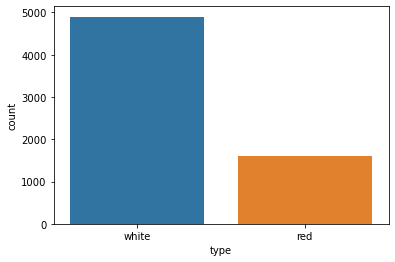

In [6]:
sns.countplot(x='type', data= train)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
train['fixed acidity']=train['fixed acidity'].fillna(train['fixed acidity'].mode()[0])
train['volatile acidity']=train['volatile acidity'].fillna(train['volatile acidity'].mode()[0])
train['citric acid']=train['citric acid'].fillna(train['citric acid'].mode()[0])
train['residual sugar']=train['residual sugar'].fillna(train['residual sugar'].mode()[0])
train['chlorides']=train['chlorides'].fillna(train['chlorides'].mode()[0])
train['pH']=train['pH'].fillna(train['pH'].mode()[0])
train['sulphates']=train['sulphates'].fillna(train['sulphates'].mode()[0])

<AxesSubplot:xlabel='quality', ylabel='count'>

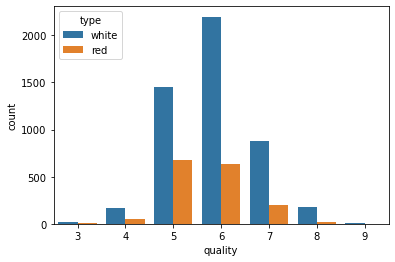

In [9]:
sns.countplot(x='quality',hue='type', data = train)

In [10]:
train.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
Type = pd.get_dummies(train['type'],drop_first=True)

In [12]:
Type
Type.value_counts()

white
1        4898
0        1599
dtype: int64

In [13]:
train= pd.concat([train,Type],axis=1)

In [14]:
train


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.50,11.2,6,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [15]:
sns.countplot

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [16]:
train.drop(['type'],axis=1, inplace=True)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


training

In [17]:
train['best quality']= [1 if i>7 else 0 for i in train.quality]

In [18]:
x= train.drop(['best quality','quality'], axis =1)
y= train['best quality']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)


In [20]:
print(y_test.value_counts())
y_train.value_counts()


0    1268
1      32
Name: best quality, dtype: int64


0    5031
1     166
Name: best quality, dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier(n_neighbors =3)
model1.fit(x_train,y_train)
y_prediction1 = model1.predict(x_test)

print('accuracy score =', accuracy_score(y_test,y_prediction1))
print('f1 score is =', f1_score(y_test,y_prediction1))
print('Confusion matrix =\n',confusion_matrix(y_test,y_prediction1))

accuracy score = 0.97
f1 score is = 0.1702127659574468
Confusion matrix =
 [[1257   11]
 [  28    4]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state =1)
model2.fit(x_train,y_train)
y_prediction2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
print('accuracy score =', accuracy_score(y_test,y_prediction2))
print('f1 score is =', f1_score(y_test,y_prediction2))
print('Confusion matrix =\n',confusion_matrix(y_test,y_prediction2))

accuracy score = 0.9807692307692307
f1 score is = 0.3902439024390244
Confusion matrix =
 [[1267    1]
 [  24    8]]


In [23]:
pd.DataFrame
submission = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_prediction1})
submission.to_csv('wine_quality.csv',index = False)

In [24]:
submission

,Real Values,Predicted Values
3103,0,0
1419,0,0
4761,0,0
4690,0,0
4032,0,0
...,...,...
889,0,0
2850,0,0
4917,0,0
5198,0,0


In [25]:
from sklearn.linear_model import LogisticRegression
rg=LogisticRegression(solver='lbfgs', max_iter=99999)
rg.fit(x_train,y_train)
y_prediction = rg.predict(x_test)

from sklearn.metrics import accuracy_score
print('accuracy score =', accuracy_score(y_test,y_prediction))
print('f1 score is =', f1_score(y_test,y_prediction))
print('Confusion matrix =\n',confusion_matrix(y_test,y_prediction))

accuracy score = 0.9753846153846154
f1 score is = 0.0
Confusion matrix =
 [[1268    0]
 [  32    0]]
